In [2]:
#Se importan las librerias con las cuales se va a desarrollar el ejercicio

#Manejo de datos
import pandas as pd
import numpy as np
import os
import glob 
import openpyxl

#Gráficos
import seaborn as sns
import matplotlib.pyplot as plt


#ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 
from xverse.transformer import WOE
from xverse.transformer import MonotonicBinning
from xverse.ensemble import VotingSelector
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers

In [3]:
# Lee los nombres de archivos del directorio de trabajo
filenames = glob.glob('Datos/*.csv')
df = pd.DataFrame()
for filename in filenames:
    data = pd.read_csv(filename)
    print(data.shape)
    df = df.append(data)
    df.shape

(5561, 1760)
(8322, 1761)


In [4]:
df.head()

,A,AA,AC,AD,AE,AF,AG,AH,AI,AK,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
0,28.571,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.979,0.0,1.895,0.994,0.781,0.0,0.0,0.0
1,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.769,0.0,2.119,0.028,1.000,0.0,0.0,0.0
2,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.844,0.0,0.977,0.096,0.138,0.0,0.0,0.0
3,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.564,0.0,0.504,0.096,0.095,0.0,0.0,0.0
4,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.813,0.0,0.980,0.848,0.065,0.0,0.0,0.0


In [5]:
# Eliminamos la columna que ennumera del primer archivo
df_dep = df.drop(columns="Unnamed: 0")
df_dep.pop("sequence")
df_dep.head()

,A,AA,AC,AD,AE,AF,AG,AH,AI,AK,...,tausw28,tausw29,tausw3,tausw30,tausw4,tausw5,tausw6,tausw7,tausw8,tausw9
0,28.571,16.67,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.979,0.0,1.895,0.994,0.781,0.0,0.0,0.0
1,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.769,0.0,2.119,0.028,1.000,0.0,0.0,0.0
2,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.844,0.0,0.977,0.096,0.138,0.0,0.0,0.0
3,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.564,0.0,0.504,0.096,0.095,0.0,0.0,0.0
4,0.000,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.813,0.0,0.980,0.848,0.065,0.0,0.0,0.0


In [6]:
# Asignamos la variable objetivo
y = df_dep.pop("class")

In [7]:
df_dep.shape

(13883, 1758)

In [8]:
# Normalizamos el set de datos
names = df_dep.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df_dep)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [9]:
# Particionamos el set de datos
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size = .2, random_state=42)

## Entrenamos con los datos sin balancear

In [10]:
# Random Forest Validación sin balancear datos
# Entrenamos un modelo con Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_ = RandomForestClassifier(random_state=42)
rf_.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [11]:
# Hacemos predicciones con la data de prueba
predict = rf_.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[ 931,  205],
       [  55, 1586]], dtype=int64)

In [12]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       0.94      0.82      0.88      1136
           1       0.89      0.97      0.92      1641

    accuracy                           0.91      2777
   macro avg       0.91      0.89      0.90      2777
weighted avg       0.91      0.91      0.91      2777



In [13]:
val_data = pd.read_csv('Datos/val/DatosValidacion1.csv')
val_data.pop("Unnamed: 0")
val_data.pop("Unnamed: 0.1")
val_data.pop("sequence")
y2 = val_data.pop("class")
val_data.head()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,...,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99
0,33,3897.77,8.691,0.002230,11.404358,-0.112121,84.766667,0.030303,85.757576,3.333939,...,-0.928374,2.771416,-0.851930,-0.459909,0.909622,1.402783,-3.848056,-0.528822,-0.740751,-0.257650
1,34,4003.64,7.590,0.001896,10.196106,-0.638235,76.035294,0.117647,34.411765,3.875588,...,-1.030314,2.356963,-0.590644,-0.433246,0.362768,1.204798,-3.838024,-0.859893,-1.086264,0.052278
2,35,4121.92,6.689,0.001623,9.611023,-0.551429,16.851429,0.057143,64.000000,3.107429,...,-0.846578,2.762231,-1.182640,-0.908285,0.802487,1.546229,-4.543212,-0.786475,-0.477468,-0.178319
3,31,3838.56,6.589,0.001717,9.802917,-0.200000,53.977419,0.161290,47.096774,3.012581,...,-0.960986,1.742604,-0.981736,-0.098695,0.614634,0.774174,-2.818301,-0.395545,-0.738405,0.369630
4,33,3715.45,3.591,0.000967,8.981384,0.660606,62.042424,0.090909,91.212121,1.404848,...,-1.034936,1.734715,-0.830263,-0.386610,0.836167,0.859871,-3.665342,-0.922017,-0.364447,-0.055827


In [14]:
# Normalizamos el set de datos de validación
names = val_data.columns
scaler = preprocessing.StandardScaler()
scaled_val_data = scaler.fit_transform(val_data)
scaled_val_data  = pd.DataFrame(scaled_val_data, columns=names)
scaled_val_data.head()

,length,molecular_weight,charge,charge_density,isoelectric_point,gravy,instability_index,aromaticity,aliphatic_index,boman_index,...,embed_2_90,embed_2_91,embed_2_92,embed_2_93,embed_2_94,embed_2_95,embed_2_96,embed_2_97,embed_2_98,embed_2_99
0,1.200441,1.488957,2.993163,2.041380,1.680420,0.057637,1.795329,-0.751363,-0.178559,1.487591,...,-0.709365,1.945619,-1.703364,0.675871,1.054814,3.373537,-2.357323,0.456880,-0.985170,-1.610517
1,1.346667,1.627166,2.600490,1.720552,1.201197,-0.688985,1.474132,0.681090,-1.690778,1.908721,...,-0.996886,1.241833,-0.840013,0.748034,-0.608378,2.709067,-2.344236,-0.497817,-2.046474,-0.469698
2,1.492893,1.781575,2.279148,1.458301,0.969138,-0.565795,-0.703036,-0.311187,-0.819356,1.311480,...,-0.478661,1.930022,-2.796106,-0.537628,0.728976,3.854966,-3.264137,-0.286104,-0.176447,-1.318507
3,0.907989,1.411661,2.243483,1.548356,1.045248,-0.067074,0.662700,1.396846,-1.317184,1.237736,...,-0.801345,0.198585,-2.132271,1.653474,0.157642,1.263816,-1.014032,0.841203,-0.977964,0.698452
4,1.200441,1.250947,1.174245,0.827828,0.719407,1.154235,0.959383,0.242584,-0.017914,-0.012268,...,-1.009921,0.185188,-1.631771,0.874250,0.831410,1.551430,-2.118977,-0.676961,0.170717,-0.867622


In [16]:
data_val_x = scaled_val_data

In [17]:
# Hacemos predicciones con la data de prueba
predict = rf_.predict(data_val_x)
from sklearn.metrics import confusion_matrix
confusion_matrix(y2, predict)

array([[  34, 1320],
       [   6,  263]], dtype=int64)

In [18]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(y2, predict))

precision    recall  f1-score   support

           0       0.85      0.03      0.05      1354
           1       0.17      0.98      0.28       269

    accuracy                           0.18      1623
   macro avg       0.51      0.50      0.17      1623
weighted avg       0.74      0.18      0.09      1623



In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(rf_, data_val_x, y2, cv=cv)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.02)


## Se balancea el dataset

In [20]:
%%time
# Se balancean los datos de entrenamiento
sm = SMOTE(random_state=42)
sm_data_X,sm_data_y=sm.fit_sample(X_train, y_train)

Wall time: 1min 1s


In [21]:
## Convirtiendo en DataFrame
bal_data_X = pd.DataFrame(sm_data_X, columns=X_train.columns)
bal_data_y = pd.Series(sm_data_y)


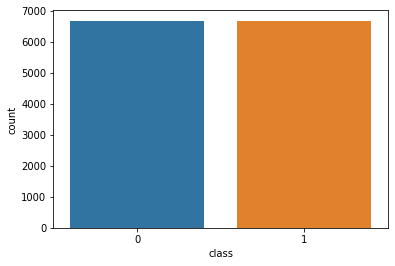

In [276]:
%matplotlib inline
# Revisamos las clases

sns.countplot(bal_data_y)

### Se hallan las características mas importantes

In [23]:
%%time
vs = VotingSelector()
vs.fit(bal_data_X, bal_data_y)

Wall time: 42min 12s


VotingSelector(exclude_features=None, feature_names='all',
               handle_category='woe', minimum_votes=0, no_of_features=879,
               numerical_missing_values='median',
               selection_techniques=['WOE', 'RF', 'RFE', 'ETC', 'CS', 'L_ONE'])

In [25]:
# Revisamos las clases
sns.countplot(bal_data_y)

## Entrenamos con los datos balanceados

In [26]:
# Random Forest Validación balanceado
# Entrenamos un modelo con Random Forest 
from sklearn.ensemble import RandomForestClassifier
rf_ = RandomForestClassifier(random_state=42)
rf_.fit(bal_data_X, bal_data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
# Hacemos predicciones con la data de prueba
predict = rf_.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict)

array([[ 957,  179],
       [  89, 1552]], dtype=int64)

In [28]:
# Revisamos otras metricas del modelo
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

precision    recall  f1-score   support

           0       0.91      0.84      0.88      1136
           1       0.90      0.95      0.92      1641

    accuracy                           0.90      2777
   macro avg       0.91      0.89      0.90      2777
weighted avg       0.90      0.90      0.90      2777



In [232]:
delta_crit = 4
priorizadas = vs.feature_votes_[vs.feature_votes_["Votes"]>delta_crit]["Variable_Name"].values
#print("Estas son las variables más importantes, según el consenso de votos de selección,", \
  #    delta_crit+1," donde las columnas de interes son:",\
   #   priorizadas)

In [233]:
rf_ = RandomForestClassifier(random_state=42)
rf_.fit(bal_data_X[priorizadas], bal_data_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [234]:
predict = rf_.predict(data_val_x[priorizadas])
from sklearn.metrics import confusion_matrix
confusion_matrix(y2, predict)

array([[ 296, 1058],
       [   5,  264]], dtype=int64)

In [235]:
print(classification_report(y2, predict))

precision    recall  f1-score   support

           0       0.98      0.22      0.36      1354
           1       0.20      0.98      0.33       269

    accuracy                           0.35      1623
   macro avg       0.59      0.60      0.34      1623
weighted avg       0.85      0.35      0.35      1623



### Buscamos los mejores hiperparámetros para el modelo

In [181]:
param_grid = { 
    'n_estimators': [30, 50, 100, 200],
    'max_features': ['auto', 'sqrt', .3, .1, .05],
    'max_depth' : [1,2,3,4,5,6],
    'criterion' :['gini', 'entropy'],
    'min_samples_leaf': [2, 3, 4, 5],  
    #'params': [{'kernel' : 'rbf', 'gamma' : 0.1}, ...],  
    'min_samples_split': [12, 16, 20]
}

In [36]:
%%time
from sklearn.model_selection import RandomizedSearchCV
rf_rdm= RandomizedSearchCV(estimator=rf_, param_distributions=param_grid, cv= 5, n_iter=100, n_jobs=-1)
rf_rdm.fit(bal_data_X[priorizadas], bal_data_y)

Wall time: 58min 34s


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [37]:
rf_rdm.best_params_

{'n_estimators': 50,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_features': 0.5,
 'max_depth': 6,
 'criterion': 'gini'}

In [279]:
rf1=RandomForestClassifier(random_state=42, max_features=.05, n_estimators= 50, max_depth=6, criterion='gini', min_samples_split = 16,min_samples_leaf = 3 )

In [280]:
rf1.fit(bal_data_X[priorizadas], bal_data_y)
predict1 = rf1.predict(data_val_x[priorizadas])
confusion_matrix(y2, predict1)

array([[526, 828],
       [  8, 261]], dtype=int64)

In [281]:
print(classification_report(y2, predict1))

precision    recall  f1-score   support

           0       0.99      0.39      0.56      1354
           1       0.24      0.97      0.38       269

    accuracy                           0.48      1623
   macro avg       0.61      0.68      0.47      1623
weighted avg       0.86      0.48      0.53      1623



### Particionamos el set de datos de validación

In [239]:
predict1 = rf1.predict(data_val_x[priorizadas][0:500])
print(confusion_matrix(y2[0:500], predict1))
print(classification_report(y2[0:500], predict1))

[[ 79 152]
 [ 13 256]]
              precision    recall  f1-score   support

           0       0.86      0.34      0.49       231
           1       0.63      0.95      0.76       269

    accuracy                           0.67       500
   macro avg       0.74      0.65      0.62       500
weighted avg       0.73      0.67      0.63       500



In [240]:
predict1 = rf1.predict(data_val_x[priorizadas][501:1000])
print(confusion_matrix(y2[501:1000], predict1))
print(classification_report(y2[501:1000], predict1))

[[167 332]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.33      0.50       499
           1       0.00      0.00      0.00         0

    accuracy                           0.33       499
   macro avg       0.50      0.17      0.25       499
weighted avg       1.00      0.33      0.50       499



In [241]:
predict1 = rf1.predict(data_val_x[priorizadas][1001:1623])
print(confusion_matrix(y2[1001:1623], predict1))
print(classification_report(y2[1001:1623], predict1))

[[218 404]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.35      0.52       622
           1       0.00      0.00      0.00         0

    accuracy                           0.35       622
   macro avg       0.50      0.18      0.26       622
weighted avg       1.00      0.35      0.52       622



In [242]:
from sklearn.metrics import accuracy_score
ini = -1
fin = 100
for i in range(17):
    ini = ini + 1
    print("Iteración:", i, ",", ini, "-", fin )
    predict1 = rf1.predict(data_val_x[priorizadas][ini:fin])
    print("Accuracy:", accuracy_score(y2[ini:fin],predict1) )
    print(classification_report(y2[ini:fin], predict1))
    ini += 99
    fin += 100 

Iteración: 0 , 0 - 100
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.95      0.97       100

    accuracy                           0.95       100
   macro avg       0.50      0.47      0.49       100
weighted avg       1.00      0.95      0.97       100

Iteración: 1 , 100 - 200
Accuracy: 0.98
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.98      0.99       100

    accuracy                           0.98       100
   macro avg       0.50      0.49      0.49       100
weighted avg       1.00      0.98      0.99       100

Iteración: 2 , 200 - 300
Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      0.39      0.49        31
           1       0.77      0.91      0.83        69

    accuracy                           0.75       100
   macro a

In [282]:
rf1=RandomForestClassifier(random_state=42, max_features=.05, n_estimators= 20, max_depth=2, criterion='gini', min_samples_split = 16,min_samples_leaf = 3, oob_score = True)
rf1.fit(bal_data_X[priorizadas], bal_data_y)
predict1 = rf1.predict(data_val_x[priorizadas])
confusion_matrix(y2, predict1)
print(classification_report(y2, predict1))

precision    recall  f1-score   support

           0       0.95      0.80      0.87      1354
           1       0.44      0.80      0.56       269

    accuracy                           0.80      1623
   macro avg       0.69      0.80      0.71      1623
weighted avg       0.87      0.80      0.82      1623



In [283]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y2, predict1)

0.44411041944782026

In [284]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y2, predict1)

0.7954800041732332

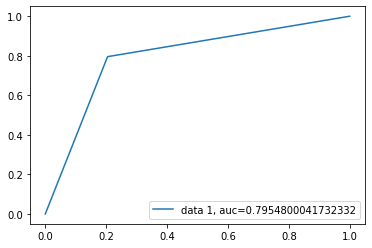

In [285]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y2, predict1)
auc = metrics.roc_auc_score(y2, predict1)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show() 

In [271]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y2, predict1)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [189]:
# Aplicamos validación cruzada para evaluar el performance del modelo
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
kfold = StratifiedKFold(10) #KFold(n_splits=10, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1']
results_woh = cross_validate(rf1, scaled_df, y, cv = kfold, scoring = scoring)
print("Accuracy: %.2f%% (+/- %.2f%%)" % (results_woh['test_accuracy'].mean()*100, results_woh['test_accuracy'].std()*100))
print("Precision: %.2f%% (+/- %.2f%%)" % (results_woh['test_precision'].mean()*100, results_woh['test_precision'].std()*100))
print("Recall: %.2f%% (+/- %.2f%%)" % (results_woh['test_recall'].mean()*100, results_woh['test_recall'].std()*100))
print("F1 score: %.2f%% (+/- %.2f%%)" % (results_woh['test_f1'].mean()*100, results_woh['test_f1'].std()*100))

Accuracy: 81.58% (+/- 13.50%)
Precision: 81.15% (+/- 13.89%)
Recall: 95.39% (+/- 0.88%)
F1 score: 86.99% (+/- 8.34%)


In [202]:
predict1 = rf1.predict(data_val_x[priorizadas][0:500])
print("Accuracy:", accuracy_score(y2[0:500],predict1) )
print(classification_report(y2[0:500], predict1))

Accuracy: 0.748
              precision    recall  f1-score   support

           0       0.81      0.60      0.69       231
           1       0.72      0.88      0.79       269

    accuracy                           0.75       500
   macro avg       0.76      0.74      0.74       500
weighted avg       0.76      0.75      0.74       500



In [184]:
%%time
from sklearn.model_selection import GridSearchCV
rf_gs = GridSearchCV(estimator=rf_, param_grid=param_grid, cv= 5, n_jobs=2)
rf_gs.fit(bal_data_X[priorizadas], bal_data_y)

KeyboardInterrupt: 

In [ ]:
rf_gs.best_params_

In [ ]:
rf2=RandomForestClassifier(random_state=42, max_features=.05, n_estimators= 30, max_depth=3, criterion='gini', min_samples_split = 16,min_samples_leaf = 3, oob_score = True)
rf2.fit(bal_data_X[priorizadas], bal_data_y)
predict2 = rf2.predict(data_val_x[priorizadas])
confusion_matrix(y2, predict2)
print(classification_report(y2, predict2))